In [1]:
import pandas as pd

""" Sandobx for all things realted to Snippets extraction and generic stuff.
Not downstream things (elsewhere).
"""

' Sandobx for all things realted to Snippets extraction and generic stuff.\nNot downstream things (elsewhere).\n'

In [2]:
%load_ext autoreload
%autoreload 2

from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

In [3]:
# DATE = 230830
# animal = "Pancho"
# DATE = 230619
DATE = 230615
animal = "Diego"
# spikes_version = "tdt"
spikes_version = "kilosort_if_exists"
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version=spikes_version) 
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt") 

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-104852
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-105514
session:  0
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-104852
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-105514
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
Beh Sessions that exist on this date:  {230615: [(2, 'priminvar5'), (3, 'priminvar5')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['priminvar5']
Loading these beh sessions: [2]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many pat

In [ ]:

### Snippets, split by stroke index and location
MS.print_summary_sessions()
from neuralmonkey.classes.snippets import Snippets, extraction_helper

In [ ]:
len(sn.get_trials_list(True))

In [ ]:

# Pick out a single session
sn = MS.SessionsList[0]


In [ ]:
# Turn on debug mode, this prunes sites and trials, so below runs faster
# sn.debug_mode_switch_to(sites=True, trials=False)
for sn in MS.SessionsList:
    sn.debug_mode_switch_to(sites=True, trials=True)

In [ ]:
sn.sitegetter_print_summarytext_each_unit

In [ ]:
#### TODO:

In [ ]:
# problem 1. Stroke onset time -- why don't they match between SN and Datasetbeh.
# problem 2. concatting DS across sessions for Pancho --> failing.

##### Loading beh dataset from raw

In [ ]:
sn.datasetbeh_load_helper(sn.DatasetbehExptname)

# [GOOD] Extract Snippets across all SN in MS, and clean as you would if you loaded from pre-saved

### Wrapper to regenerate Snippets

In [ ]:
MS.debug_mode_switch_to(sites=True, trials=True)

In [7]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
# which_level = "stroke"
# which_level = "substroke"
which_level = "trial"
EVENTS_KEEP = ["03_samp"]
PRE_DUR=-0.5
POST_DUR=0.5
DEBUG = False
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level, EVENTS_KEEP, DEBUG=DEBUG,
                                                PRE_DUR=PRE_DUR, POST_DUR=POST_DUR)

** NOT SKIPPING EXTRACTION, since was not able to load snippets, for: 
(animal, DATE, which_level, session)
Diego 230615 trial 0
Starting length of D.Dat: 24
--BEFORE REMOVE; existing supervision_stage_concise:
supervision_stage_concise
off|0||1111|0    24
Name: count, dtype: int64
############ NOT PRUNING SUPERVISION TRIALS
Dataset final len: 24
*** RUNNING D.preprocessGood using these params:
['sanity_gridloc_identical']
-- Len of D, before applying this param: sanity_gridloc_identical, ... 24
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {0: -1.6, 1: 1.7}
y... {1: 1.7, 0: -1.6}
after: 24
Kept these events:  ['samp']

 == extarcating these sites:  [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1426, 1049, 

In [ ]:
# Load a question
from neuralmonkey.analyses.rsa import rsagood_questions_dict
date = DATE
# question = "CHAR_BASE_trial"
# question = "CHAR_BASE_stroke"
# question = "PIG_BASE_stroke"
# question = "RULESW_BASE_stroke"
question = "SS_shape"
substrokes_plot_preprocess = False
HACK_RENAME_SHAPES = False

q_params = rsagood_questions_dict(animal, date, question=question)[question]
print("Question:", question)
print("These questions params:")
for k, v in q_params.items():
    print(k, " -- ", v)
assert which_level in q_params["list_which_level"], "or else might run into error later."

# Clean up SP and extract features
D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=q_params["ANALY_VER"], vars_extract_append=q_params["effect_vars"],
    substrokes_plot_preprocess=substrokes_plot_preprocess,
    HACK_RENAME_SHAPES=HACK_RENAME_SHAPES)


In [162]:
sites = SP.Sites[:10]
event = "03_samp"


In [168]:
### Lower-level extraction of PA
from pythonlib.tools.pandastools import grouping_count_n_samples_quick, grouping_count_n_samples
# PA, _ = SP.dataextract_as_popanal_statespace(SP.Sites, "03_go_cue")

replace_fr_sm_with_spike_counts = True
dfthis = SP.dataextract_as_df_multsites_wrapper(sites, event, pre_dur=PRE_DUR, post_dur=POST_DUR,
                                                replace_fr_sm_with_spike_counts=replace_fr_sm_with_spike_counts)


In [166]:
SP.Params

{'which_level': 'trial',
 '_list_events': ['samp'],
 'list_events_uniqnames': ['03_samp'],
 'list_features_extraction': [],
 'list_features_get_conjunction': [],
 'list_pre_dur': [-0.5],
 'list_post_dur': [0.5],
 'map_var_to_othervars': None,
 'strokes_only_keep_single': False,
 'tasks_only_keep_these': None,
 'prune_feature_levels_min_n_trials': 1,
 'fr_which_version': 'sqrt',
 'SPIKES_VERSION': 'kilosort',
 'map_var_to_levels': None}

In [195]:
list_features_extraction = ["seqc_0_shape"]
replace_fr_sm_with_spike_counts = True
spike_counts_bin_size = 0.001
PA, sample_meta = SP.dataextract_as_popanal_statespace(sites, event="03_samp", pre_dur=PRE_DUR, post_dur=POST_DUR,
                                     list_features_extraction=list_features_extraction,
                                     replace_fr_sm_with_spike_counts=replace_fr_sm_with_spike_counts, 
                                     spike_counts_bin_size=spike_counts_bin_size)

Colected 447 out of 447 datapts.
NOTE: missed datapts are likely because of removed outliers


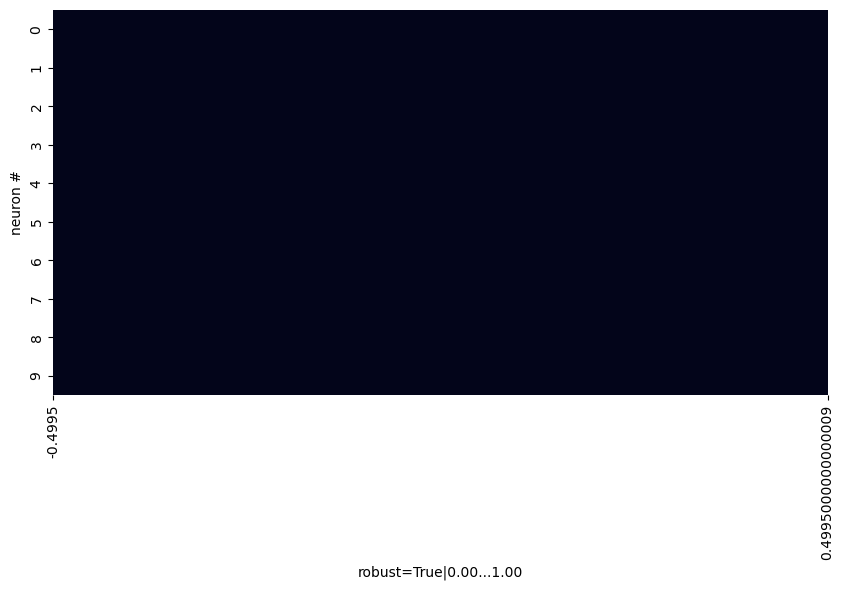

In [179]:
PA.plotNeurHeat(0)

In [ ]:
tmp = np.concatenate(dfthis["fr_sm"])


8

In [138]:
bregion = "PMv"
s = SP.sitegetter_map_region_to_sites(bregion)[20]

In [129]:
SP.datasetbeh_append_column_mult(["seqc_0_shape", "seqc_0_loc"])

 ** extravcting dataset
Snippets -- extracting beh dataset for first time! (concatting and tokens preprocess)
Generated index mappers!
Searching using this string:
/home/lucas/code/drawmonkey/drawmonkey/expt_metadat/*230615-*Diego.**
Found this many paths:
0
Searching using this string:
/home/lucas/code/drawmonkey/drawmonkey/expt_metadat_daily/*230615-*Diego.**
Found this many paths:
1
---
/home/lucas/code/drawmonkey/drawmonkey/expt_metadat_daily/priminvar5-230615-Diego.yaml
Loading this dataset Diego priminvar5 230615
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/analyses/database/*Diego-*priminvar5-*230615-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/analyses/database/BEH/*Diego-*priminvar5-*230615-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/home/lucas/mnt/Freiwald_kgupta/kgupta/analyses/database/BEH/Diego-priminvar5-230615-230616_022850
----

In [183]:
SP.datamod_append_spikecounts(bin_size = 0.001, replace_sm_fr=True)

2

In [194]:
assert len(SP.DfScalar.iloc[0]["spike_times"]) == np.sum(SP.DfScalar.iloc[0]["fr_sm"])

(<Figure size 924x700 with 8 Axes>,
 array([[<Axes: title={'center': '((0, 0),)'}, ylabel='((0, 0),)'>,
         <Axes: title={'center': '((0, 1),)'}, ylabel='((0, 1),)'>,
         <Axes: title={'center': '((1, 0),)'}, ylabel='((1, 0),)'>,
         <Axes: title={'center': '((1, 1),)'}, ylabel='((1, 1),)'>],
        [<Axes: title={'center': '((0, 0),)'}>,
         <Axes: title={'center': '((0, 1),)'}>,
         <Axes: title={'center': '((1, 0),)'}>,
         <Axes: title={'center': '((1, 1),)'}>]], dtype=object))

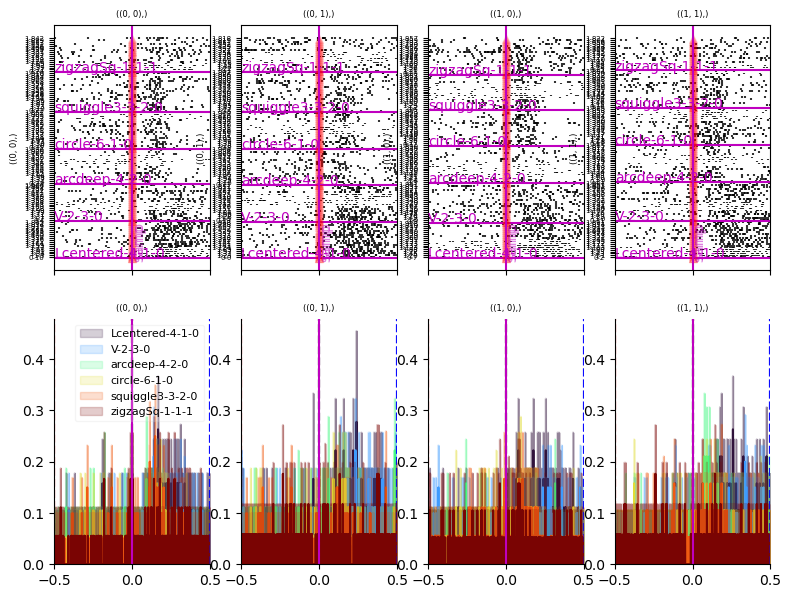

In [184]:
SP.plotgood_rasters_smfr_each_level_combined(s, "seqc_0_shape", vars_others=["seqc_0_loc"], event="03_samp")

(<Figure size 924x700 with 8 Axes>,
 array([[<Axes: title={'center': '((0, 0),)'}, ylabel='((0, 0),)'>,
         <Axes: title={'center': '((0, 1),)'}, ylabel='((0, 1),)'>,
         <Axes: title={'center': '((1, 0),)'}, ylabel='((1, 0),)'>,
         <Axes: title={'center': '((1, 1),)'}, ylabel='((1, 1),)'>],
        [<Axes: title={'center': '((0, 0),)'}>,
         <Axes: title={'center': '((0, 1),)'}>,
         <Axes: title={'center': '((1, 0),)'}>,
         <Axes: title={'center': '((1, 1),)'}>]], dtype=object))

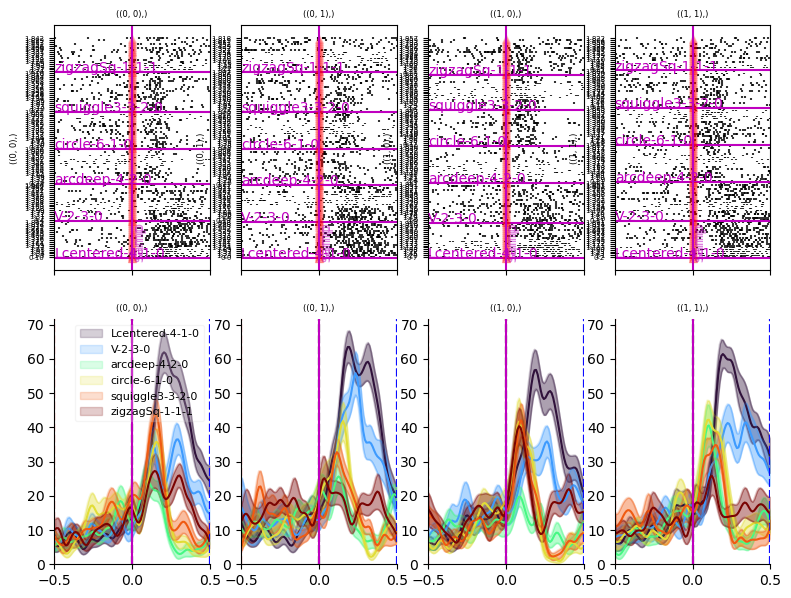

In [139]:
SP.plotgood_rasters_smfr_each_level_combined(s, "seqc_0_shape", vars_others=["seqc_0_loc"], event="03_samp")

##### Debugging

In [ ]:
from neuralmonkey.classes.snippets import datasetstrokes_extract
sn = MS.SessionsList[1]
D = sn.Datasetbeh
DS = datasetstrokes_extract(D, "all_no_clean")

### Below -- breaking out the above function

In [ ]:
from neuralmonkey.scripts.analy_snippets_extract import extract_snippets_all_sessions

which_level = "stroke"
EVENTS_KEEP = None

# which_level = "trial"
# EVENTS_KEEP = ["03_samp", "go_cue"]

# version 2
LIST_SP = extract_snippets_all_sessions(MS, which_level, EVENTS_KEEP, 1, False)

In [ ]:
# # Reproduce this.
# SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level,
#     DEBUG=DEBUG)

from neuralmonkey.classes.snippets import concat_mult_snippets
SP = concat_mult_snippets(LIST_SP, MS)

In [ ]:
SP.datasetbeh_extract_dataset().Dat["trialcode"]

In [ ]:
SP.DS = None

In [ ]:
SP.datasetbeh_extract_dataset("datstrokes").Dat["trialcode"]

In [ ]:
[tc for tc in SP.DS.Dat["trialcode"] if tc in SP.datasetbeh_extract_dataset().Dat["trialcode"].tolist()]

In [ ]:
# dataset preprocess
ANALYVER = "rulesingle"
D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=ANALYVER, vars_extract_append=[])



In [ ]:
D = SP.datasetbeh_extract_dataset().copy()

In [ ]:
DS = SP.datasetbeh_extract_dataset("datstrokes")

In [ ]:
DS.Dat["trialcode"]

In [ ]:
DS.dataset_slice_by("trialcode", ["230817-1-1"])

In [ ]:
D.grammarparses_successbinary_score()

In [ ]:
D.preprocessGood(params=['remove_baseline', 'correct_sequencing_binary_score', 'one_to_one_beh_task_strokes', 'beh_strokes_at_least_one'])

In [ ]:
d = DS.Dataset
d.taskclass_tokens_extract_wrapper(22, "beh_using_task_data")

In [ ]:
### TODO:
# 1) in if params["datasetstrokes_extract_chunks_variables,(anova params) --> regenerate DS, since it needs to use the tokens from original data, not those in DS.Dat["datseg"] -- OR: extract those tokens and place into DS.

In [ ]:
DS.context_extract_strokeslength_list(1, "datseg")

In [ ]:
DS.context_chunks_assign_columns()

In [ ]:
# First, place preprocessed D (from above) into DS.
DS.dataset_replace_dataset(D)
# Then prune DS to match D.
DS.dataset_prune_self_to_match_dataset()

# Second, extract chunk variables from Dataset
for i in range(len(DS.Dataset.Dat)):
    DS.Dataset.grammarparses_taskclass_tokens_assign_chunk_state_each_stroke(i)

# Third, extract variables to strokes
DS.context_chunks_assign_columns()


In [ ]:
D = sn.Datasetbeh.copy()
D.tokens_append_to_dataframe_column(force_regenerate=True)
D.seqcontext_delete_all_columns()


In [ ]:
sn.Datasetbeh.taskclass_tokens_extract_wrapper(0, "beh_using_beh_data")

In [ ]:
D.taskclass_tokens_extract_wrapper(0, "beh_using_beh_data")

In [ ]:
D = SP.datasetbeh_extract_dataset()

In [ ]:
# Generate DS

In [ ]:
SP.DfScalar[:2]

In [ ]:
ds = SP.datasetbeh_extract_dataset("datstrokes")


##### TO TEST (after new changes to SP)

In [ ]:
# Strokes --> where is DS and is it compativ with D
# Plotting

In [ ]:
# Pop --> no thrown out data.
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_from_MS
EVENTS_KEEP = ["03_samp", "04_go_cue"]
DFallpa = dfallpa_extractdion_load_wrapper_from_MS(MS, question, [(-0.6, 0.6)], which_level,
                                        EVENTS_KEEP, REGENERATE_SNIPPETS=True)

In [ ]:
# DEBUGGING ABOVE's dfallpa_extraction_load_wrapper_from_MS
from pythonlib.tools.pandastools import grouping_count_n_samples_quick, grouping_count_n_samples
# grouping_count_n_samples_quick(SP.DfScalar, ["event", "index_datapt"])
grpdict = grouping_count_n_samples(SP.DfScalar, ["event", "index_datapt"])
print([min(grpdict), max(grpdict)])

PA, _ = SP.dataextract_as_popanal_statespace(SP.Sites, "04_go_cue")
SP.dataextract_as_popanal_good(SP.DfScalar, )

In [ ]:
pa = DFallpa["pa"].values[0]
pa.plotNeurHeat(0)


# Substroke snippets extract

In [ ]:
from neuralmonkey.classes.snippets import extraction_helper
which_level = "substroke"
SP = extraction_helper(sn, which_level, PRE_DUR=-0.1, POST_DUR=0.1)


### Plots

In [ ]:
SP.sitegetter_map_region_to_sites("vlPFC_p")

In [ ]:
site = 281
var = "epoch"
vars_others = ["stroke_index_is_first", "stroke_index_is_last_tskstks", "CTXT_locoffclust_prev", "CTXT_shape_prev", "shape", "loc_on_clust"]
# vars_others = ["stroke_index_is_first", "stroke_index_is_last_tskstks", "CTXT_locoffclust_prev",
#                                  "shape", "loc_on_clust", "CTXT_shape_prev", "CTXT_loconclust_next", "chunk_rank",
#                                  "chunk_within_rank_semantic"]
plotvers = ["smfr"]
suffix = 1
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

from pythonlib.tools.plottools import savefig
savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
site = 273
var = "chunk_rank"
vars_others = ["epoch", "CTXT_loc_prev", "shape", "gridloc"]
plotvers = ["smfr"]
suffix = 1
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

from pythonlib.tools.plottools import savefig
savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
site = 273
var = "CTXT_shape_next"
vars_others = ["task_kind", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"]
plotvers = ["smfr"]
suffix = 1
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

from pythonlib.tools.plottools import savefig
savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
var = "CTXT_shape_next"
vars_others = ["task_kind", "stroke_index", "shape", "gridloc", "CTXT_loc_next"]
suffix = 2
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
site = 274
var = "CTXT_shape_next"
vars_others = ["task_kind", "gridloc", "CTXT_loc_prev", "shape"]
suffix = 2
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
site = 274
var = "stroke_index"
vars_others = ["task_kind", "gridloc", "CTXT_loc_prev", "shape"]
suffix = 2
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

savefig(fig, f"/tmp/test-{suffix}.pdf")

# Stroke snippets

In [ ]:
which_level = "stroke"
SP = extraction_helper(sn, which_level, PRE_DUR=-0.6, POST_DUR=0.6)


# # == MODIFY THESE:
# list_pre_dur = [-0.2]
# list_post_dur = [0.4]
# # list_pre_dur = [-0.5]
# # list_post_dur = [0.5]
# # which_level = "stroke_off"
# which_level = "stroke"
# 
# # == IGNORE THESE:
# strokes_only_keep_single = False # if True, then prunes dataset, removing trials "remove_if_multiple_behstrokes_per_taskstroke"
# prune_feature_levels_min_n_trials = 1 
# list_events = [] # must be empty
# list_features_extraction = []
# list_features_get_conjunction = []
# trials_prune_just_those_including_events=False
# 
# SP = Snippets(sn,
#     which_level,
#     list_events,
#     list_features_extraction,
#     list_features_get_conjunction,
#     list_pre_dur,
#     list_post_dur,
#     strokes_only_keep_single=strokes_only_keep_single,
#     tasks_only_keep_these=None,
#     prune_feature_levels_min_n_trials=prune_feature_levels_min_n_trials,
#     dataset_pruned_for_trial_analysis=None,
#     trials_prune_just_those_including_events=trials_prune_just_those_including_events,
#     fr_which_version='sqrt',
#     NEW_VERSION=True,
#     SKIP_DATA_EXTRACTION=False
#              )


# Flex snippets

In [ ]:
# Main code for extracting Snippets (SP)

assert False, "incorporate into extraction_helper"
# == MODIFY THESE:
list_events = ["go"]
list_pre_dur = [-0.5]
list_post_dur = [0.5]

# == IGNORE THESE:
which_level = "flex"
list_features_extraction = []
list_features_get_conjunction = []
trials_prune_just_those_including_events=False

SP = Snippets(sn,
    which_level,
    list_events,
    list_features_extraction,
    list_features_get_conjunction,
    list_pre_dur,
    list_post_dur,
    strokes_only_keep_single=False,
    tasks_only_keep_these=None,
    prune_feature_levels_min_n_trials=None,
    dataset_pruned_for_trial_analysis=None,
    trials_prune_just_those_including_events=trials_prune_just_those_including_events,
    fr_which_version='sqrt',
    NEW_VERSION=True,
    SKIP_DATA_EXTRACTION=False
             )


In [ ]:
# Inspect the data. 
# Each row represents a single combination of:
# (trial, chan, event). To see that, inspect the output of 

display(SP.DfScalar)

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(SP.DfScalar, ["trialcode", "chan", "event_aligned"])


# Trial Snippets

In [ ]:
which_level = "trial"
SP = extraction_helper(sn, which_level, PRE_DUR=-0.6, POST_DUR=0.6)


# Load pre-computed Snippets

In [ ]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
from neuralmonkey.classes.session import load_mult_session_helper


In [ ]:
# DATE = 230630
# animal = "Diego"
DATE = 230126
animal = "Pancho"
spikes_version = "tdt"
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version=spikes_version) 
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt") 

In [ ]:
which_level = "trial"
EVENTS_KEEP = ["samp"] # 03_samp
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level, events_keep=EVENTS_KEEP,
    DEBUG=False)


In [ ]:
Dgood, _ = SP.datasetbeh_preprocess_clean_by_expt("chartrial", [])

In [ ]:
SP.DfScalar["seqc_0_shape"].unique()

In [ ]:
D = SP.datasetbeh_extract_dataset()
D.seqcontext_preprocess()
SP.datasetbeh_append_column_helper(["seqc_0_shape", "task_kind"])

In [ ]:
SP.datasetbeh_append_column_helper(["seqc_0_shape", "gridsize"])

In [ ]:
SP.Sites

In [ ]:
site = 1238
SP.plotgood_rasters_smfr_each_level_combined(site, var="seqc_0_shape", vars_others=["gridsize"], event="03_samp", 
                                             OVERWRITE_n_min=5,
                                                  OVERWRITE_lenient_n=1, balance_same_levels_across_ovar=True)

In [ ]:
SP.datasetbeh_append_column("epoch")

In [ ]:
D = SP.datasetbeh_extract_dataset()
D.seqcontext_preprocess()

In [ ]:
del SP.DfScalar["seqc_0_shape"]

In [ ]:
SP.datasetbeh_append_column_helper(["seqc_0_shape"])

from pythonlib.tools.pandastools import replace_values_with_this

# if "seqc_0_loc" in SP.DfScalar.columns:
#     replace_values_with_this(SP.DfScalar, "seqc_0_loc", None, ("IGN", "IGN"))

In [ ]:
SP.DfScalar["shape_this_event"] = SP.DfScalar["seqc_0_shape"]


In [ ]:
SP.DfScalar


In [ ]:
SP.datasetbeh_append_column_helper(["seqc_0_shape", "seqc_0_loc"])

In [ ]:
columns = ["seqc_0_shape", "seqc_0_loc", "taskconfig_loc", "shape_semantic_labels"]
SP.DfScalar.loc[:, columns]
df1 = SP.DfScalar.loc[:, columns].copy()
for col in columns:
    del SP.DfScalar[col]
    
for col in columns:
    SP.datasetbeh_append_column(col, Dataset=Dgood)
df2 = SP.DfScalar.loc[:, columns].copy()

np.all(df1==df2)

##### FIxing methods for concating Dataset across snippetsb

In [ ]:

SP.DS.Dat["gridloc"] = None
SP.DS.Dat["gridloc"]

In [ ]:
df = SP.DfScalar
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars

extract_with_levels_of_conjunction_vars()

In [ ]:

SP.DfScalar[:5]

In [ ]:

SP.DS.Dat["gridloc"][40:50]

In [ ]:
SP.DS.clean_preprocess_if_reloaded()

In [ ]:
SP.DS.Dat["gridloc"][40:50]


In [ ]:
SP.DS.Dat[1740:1760]

In [ ]:
list_sn = SP._session_extract_all()
for sn in list_sn:
    sn.Datasetbeh.TokensVersion = "test"
    sn.Datasetbeh.Tokens = {tc:None for tc in sn.Datasetbeh.Dat["trialcode"]}
    print(sn.Datasetbeh.TokensVersion)
sn.Datasetbeh.TokensVersion = "test"


In [ ]:
%%timeit
D = SP.datasetbeh_extract_dataset()
D.TokensVersion

In [ ]:
SP.DS.Dat[:2]

In [ ]:
SP.DS.Dat[SP.DS.Dat.isnull()]

In [ ]:
# Specify the columns where you want to replace None values
columns_to_update = ['A', 'B']

# Replace None with 'IGNORE' in the specified columns
for column in columns_to_update:
    df.loc[df[column].isna(), column] = 'IGNORE'

# Display the updated DataFrame
display(df)

In [ ]:
sum(df["B"]==(None, None))

In [ ]:
import pandas as pd
import numpy as np
data = {
    'A': [1, None, 3, 4],
    'B': ['x', 'y', None, (None, None)],
    'C': [None, None, 'foo', 'bar']
}

df = pd.DataFrame(data)
display(df)

value_template = "x"
# value_template = (None, None)
# replace_with = ("IGN", "IGN")
replace_with = "IGN"
replace_values_with_this(df, "B", value_template, replace_with)
display(df)

In [ ]:
from pythonlib.tools.pandastools import replace_values_with_this
df = SP.DS.Dat
columns_to_update = ['gridloc', 'gridloc_local', 'CTXT_loc_prev', 'CTXT_loc_prev_local', 'CTXT_loc_next', 'CTXT_loc_next_local']
replace_with = ("IGN", "IGN")
for column in columns_to_update:
    replace_values_with_this(df, column, None, replace_with)
    replace_values_with_this(df, column, (None, None), replace_with)

columns_to_update = ['gridloc_x', 'gridloc_y']
replace_with = "IGN"
for column in columns_to_update:
    replace_values_with_this(df, column, None, replace_with)
    replace_values_with_this(df, column, (None,), replace_with)
    


In [ ]:
[col for col in SP.DS.Dat.columns if "shape" in col]

In [ ]:
SP.DS.Dat["CTXT_shape_next"]

In [ ]:


                     
 'CTXT_locshape_next',
 'CTXT_locshape_prev',
 'velocity']]
for column in columns_to_update:
    df.loc[df[column].isna(), column] = 'IGNORE'


In [ ]:
%%timeit
SP.datasetbeh_extract_dataset("datstrokes")

In [ ]:
SP

# Doing things with Snippets

### Strokes SP --> Reclassify events based on stroke index. Then extract multiple pa, one for each stroke index

In [ ]:
##### Entire pipeline
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
animal = "Diego"
date = 230630
question_trial = "PIG_BASE_trial"
question_stroke = "PIG_BASE_stroke"
list_time_windows = [(-0.6, 0.6)]
combine_into_larger_areas = True
HACK_RENAME_SHAPES = False
exclude_bad_areas=True
strokes_split_into_multiple_pa = True
DFallpaALL = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                   question_stroke,
                                            list_time_windows,
                                                       combine_into_larger_areas = combine_into_larger_areas, exclude_bad_areas=exclude_bad_areas,
                                            SPIKES_VERSION="tdt",
                                            HACK_RENAME_SHAPES = HACK_RENAME_SHAPES)

In [ ]:
DFallpaALL["event"].value_counts()

In [ ]:
pa = DFallpaALL["pa"].values[0]
pa.Xlabels["trials"]["seqc_5_shape"]


In [ ]:
pa = DFallpaALL["pa"].values[-1]

# Figure out how long is seuqence
n_strokes_max = -1
for i in range(8):
    n_ignore = sum(pa.Xlabels["trials"][f"seqc_{i}_shape"]=="IGNORE")
    n_total = len(pa.Xlabels["trials"][f"seqc_{i}_shape"])
    print(n_ignore, n_total)
    if n_ignore<n_total:
        n_strokes_max=i+1
assert n_strokes_max>0
print(n_strokes_max)



### [Substrokes] - extract continuous motor variables ( methods to get substroke motor bin and context)

In [ ]:
SP.datasetbeh_preprocess_clean_by_expt("substrokes_sp", [])
# Extract motor variables (DS)
DS = SP.datasetbeh_extract_dataset("datstrokes").copy()

In [ ]:

from pythonlib.dataset.substrokes import features_motor_extract_and_bin
features_motor_extract_and_bin(DS, "/tmp")


##### Getting substroke sequential context

In [ ]:
# How mnay cases with variation in shapes, conditioned on substroke motor, including context.

from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars
var = "shape_idxwithin"
vars_others = ["di_an_ci_ve_bin", "CTXT_prev_this_next"]
extract_with_levels_of_conjunction_vars(DS.Dat, var, vars_others, n_min_across_all_levs_var=2, 
                                        lenient_allow_data_if_has_n_levels=2, prune_levels_with_low_n=True, plot_counts_heatmap_savepath="/tmp/test.png")


In [ ]:
DS.plot_multiple_sorted_by_feature_split_by_othervar(var, vars_others, plot_save_dir="/tmp")

In [ ]:
# Remove all data for which dont have the entire stroke, since then cant look at sequence context
DS.clean_preprocess_data(["dataset_missing_stroke_in_context"])

In [ ]:
len(keeps)
# len(DS.Dat)

In [ ]:
50/1601

##### Method - from D to substrokes Dataset

In [ ]:
from pythonlib.dataset.substrokes import load_presaved_using_pipeline
DSsubs, Dsubs = load_presaved_using_pipeline(D)

##### Splitting by n taksstrokes intask

In [ ]:
D = SP.datasetbeh_extract_dataset()
D.extract_beh_features(["num_strokes_task"])
SP.datasetbeh_append_column("FEAT_num_strokes_task", D)
# Conjunction of stroke index and num strokes in task.
from pythonlib.tools.pandastools import append_col_with_grp_index
SP.DfScalar = append_col_with_grp_index(SP.DfScalar, ["FEAT_num_strokes_task", "stroke_index"], "nstk_stkidx", False)
SP.DfScalar["nstk_stkidx"].value_counts()

SP.DfScalar_OutlierRows = append_col_with_grp_index(SP.DfScalar_OutlierRows, ["FEAT_num_strokes_task", "stroke_index"], "nstk_stkidx", False)
SP.DfScalar_OutlierRows["nstk_stkidx"].value_counts()



##### Plotting functions for Snippets

In [ ]:
SAVEDIR = "/gorilla1/analyses/recordings/main/shape_vs_loc_index_PIG"
import os
savedir = f"{SAVEDIR}/{animal}/{DATE}"
os.makedirs(savedir, exist_ok=True)
print(savedir)

In [ ]:
if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)1
    SP.globals_update(globals_nmin=1)


In [ ]:
chan = SP.Sites[0]
SP.plotgood_rasters(chan)

In [ ]:
SP.plotgood_rasters_smfr_combined(chan)

In [ ]:
sn.sitegetter_print_summarytext_each_unit()

In [ ]:
chan = SP.Sites[1]
for PLOT_VER in ["smfr", "raster"]:
    SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, "shape_oriented", 
                                                     "gridloc", "stroke_index",
                                                     PLOT_VER=PLOT_VER);

In [ ]:
# Rasters and smoothed FR, split by event

# SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP

chan = SP.Sites[1]
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["gridloc", "stroke_index"]);
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["gridloc"]);
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["stroke_index"]);


In [ ]:
# Show heatmap, conjucntion of other variables (how balanced is it).
from pythonlib.tools.pandastools import convert_to_2d_dataframe, grouping_plot_n_samples_conjunction_heatmap
# 
# convert_to_2d_dataframe(SP.DfScalar, "")

fig = grouping_plot_n_samples_conjunction_heatmap(SP.DfScalar, "shape_oriented", "gridloc", ["stroke_index"])

In [ ]:
chan = SP.Sites[6]
PLOT_VER = "smfr"
SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, "shape_oriented", 
                                                 "gridloc", "nstk_stkidx",
                                                 PLOT_VER=PLOT_VER);

In [ ]:
chan = SP.Sites[1]

In [ ]:
chan = SP.Sites[1]

In [ ]:
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["nstk_stkidx"]);


In [ ]:
SP

##### Rasters: substrokes...

In [ ]:

SP.datasetbeh_append_column_helper(["shape_idxwithin"])


In [ ]:
chan = SP.sitegetter_map_region_to_sites("PMv_m")[0]
# SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, var, vars_other[0], vars_other[1], PLOT_VER="smfr");
SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));

chan = SP.sitegetter_map_region_to_sites("M1_m")[1]
# SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, var, vars_other[0], vars_other[1], PLOT_VER="smfr");
SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));


In [ ]:
savedir = f"/gorilla1/analyses/recordings/main/RASTERS/{animal}-{DATE}/substrokes"
import os
os.makedirs(savedir, exist_ok=True)



In [ ]:

from pythonlib.tools.plottools import savefig

for chan in SP.Sites:
    
    chan_text = SP.session_sitegetter_summarytext(chan)

    # Pmv differetn across shapes    
    var = "shape"
    vars_other = ["index_within_stroke", "dist_angle"]
    fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));
    savefig(fig, f"{savedir}/{chan_text}-shape-vs-substrk_idx_dist_angle.png")
    
    # M1 with similar encoding for the same ss, no matter the shape or index
    var = "shape_idxwithin"
    vars_other = ["dist_angle"]
    fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));
    savefig(fig, f"{savedir}/{chan_text}-shape_idx-vs-substrk_dist_angle.png")
    
    # [Same, but splitting into grid plot]
    var = "shape_idxwithin"
    vars_other = ["distcum_binned", "angle_binned"]
    fig, axesall = SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, var, vars_other[0], vars_other[1], PLOT_VER="smfr");
    savefig(fig, f"{savedir}/{chan_text}-shape_idx-vs-substrk_dist_angle_grid.png")
    
    # M1 different across ss, no matter the shape or index
    # Trial by trial variability
    var = "dist_angle"
    vars_other = ["shape_idxwithin"]
    fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));
    savefig(fig, f"{savedir}/{chan_text}-substrk_dist_angle-vs-shape_idx.png")
    
    plt.close("all")


##### Time warping, so that can look at offset and onset

In [ ]:
SP.DfScalar[:2]

### Computing modulation of activity by certain variables (site by site)

For each site, compute how strongly it is modulated by a specific variable, computed 
separatedly for each event.

In [ ]:
SP.DfScalar[:2]

In [ ]:
# First, append the variables that you wish to analyze
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP


In [ ]:
if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)
    SP.globals_update(globals_nmin=2)


In [ ]:
# Run this to compute modulation
DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event = SP.modulationgood_compute_wrapper("epoch", 
                                                                                        DEBUG_CONJUNCTIONS=False, 
                                                                                        THINGS_TO_EXTRACT=["anova"])


In [ ]:
# Plot results and save
sdir_base = "/tmp"
SP.modulationgood_plot_WRAPPER(DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event, 
                               var="epoch", vars_conjuction=["dummy_var"],
                               sdir_base=sdir_base, N_WAYS=1)

### Modulation by time (relative to aligned events)

For each site x event, compute a scalar value indiicating how much its actiivyt is modulated
with respect to this event. This moudlation can be increase in fr, decrease, or any
activity pattern that is consistent across trials.

In [ ]:
# Extract modulation, for each site x event

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import preprocess_and_extract
from neuralmonkey.analyses.event_temporal_modulation import plot_overview

df_modtime = preprocess_and_extract(SP)


In [ ]:
# Plot overview of modulation

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import plot_overview
SAVEDIR = "/tmp"
##################### PLOTS
plot_overview(df_modtime, SP, SAVEDIR)

## Sliding decoder

In [ ]:
# 1) Separate decoders aligned to stroke onset. (grouping all stroke).
# 2) 


In [ ]:
Look at 220713_prims_state_space

# Batch plotting functions

### Plot rasters

In [ ]:
        if PLOT_RASTERS:
            for event_window, event in list_eventwindow_event:
                # (Only do once for each event)
                sdir_rasters = f"{SAVEDIR}/{ANALY_VER}/var_by_varsother/VAR_{var}-OV_{'_'.join(vars_conjuction)}/rasters/{event}"
                os.makedirs(sdir_rasters, exist_ok=True)

                print("** Plotting raster + sm fr:", sdir_rasters)
                ##### Plot raster + sm fr
                # Plot rasters for each site
                old_backend = mpl.get_backend()
                print("default backend is " + old_backend)
                mpl.use('agg') # non-GUI backend, so that the loop below doesn't run into a memory leak error (see GitHub matplotlib: #20300)
                for site in self.Sites:
                    path = f"{sdir_rasters}/{sn.sitegetter_summarytext(site)}.png"
                    if not os.path.exists(path):
                        fig, axes = self.plotgood_rasters_smfr_each_level_combined(site, var, vars_conjuction, 
                            event=event)
                        fig.savefig(path)
                        plt.close("all")
                mpl.use(old_backend) # switch back just to be safe..


In [ ]:
                for chan in SP.Sites:
                    print("plotting, chan:", chan)

                    chan_text = SP.SN.sitegetter_summarytext(chan)

                    fig, _ = SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["gridloc"])
                    path = f"{savedir}/{chan_text}-shape_oriented-vs-gridloc.png"
                    savefig(fig, path)

                    fig, _ = SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["nstk_stkidx"])
                    path = f"{savedir}/{chan_text}-shape_oriented-vs-nstk_stkidx.png"
                    savefig(fig, path)

                    # LIST_PLOT_VER = ["smfr", "raster"] # to speed it up, exclude raster
                    LIST_PLOT_VER = ["smfr"]
                    for PLOT_VER in LIST_PLOT_VER:
                        fig, _ = SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, "shape_oriented",
                                                                         "gridloc", "nstk_stkidx",
                                                                         PLOT_VER=PLOT_VER)
                        path = f"{savedir}/{chan_text}-shape_oriented-vs-other_vars-{PLOT_VER}.png"
                        savefig(fig, path)

                    plt.close("all")


# ### Scratch plots

In [ ]:
PA.plotNeurHeat(1)
PAnorm.plotNeurHeat(1)

In [ ]:
trial = 10
PA.plotNeurTimecourse(trial)
PAnorm.plotNeurTimecourse(trial)

In [ ]:
X = np.mean(PAnorm.X, axis=1, keepdims=False)
import seaborn as sns
sns.heatmap(X)

In [ ]:
SP.plotgood_rasters

In [ ]:
# pull out pa for a specific chan
chan = SP.Sites[4]

In [ ]:
chan = 50

In [ ]:
PAnorm.Chans

In [ ]:
SP.SN.sitegetter_print_summarytext_each_unit()